In [0]:
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.datasets import mnist

(60000, 28, 28)


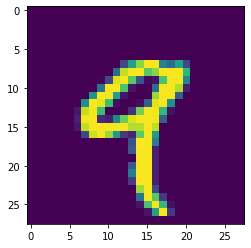

In [17]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[4])

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)  # 60000, 28 X 28 X 1 matrices
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
y_train[:10]

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [21]:

model2 = Sequential()

 
model2.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1))) #32, 3X3 filters convolve with 28X28X1 input image to give output 32 channels across 26X26 matrices

model2.add(Convolution2D(48, 3,3, activation='relu')) #34,3 X3 filters * with 32X26X26 ->   24 X 24 X48
model2.add(Convolution2D(60, 3,3, activation='relu')) #60,3 X3 filters * with 48X22X22 ->   22 X 22 X60
model2.add(MaxPooling2D(pool_size=(2, 2))) # ->  11 X 11 X 60

model2.add(Convolution2D(48, 3,3, activation='relu')) #48,3 X3 filters * with 11X11X 60->   9 X 9 X48
model2.add(Convolution2D(60, 3,3, activation='relu')) #60,3 X3 filters * with 9X9X48 ->   7 X 7 X60

model2.add(Convolution2D(10, 1, activation='relu')) # 10, 1 X 1 filters convolve with all 60 channels of 7X7 matrices  to give output 10 channels across 7 X 7 matrices
model2.add(Convolution2D(10, 7))  #10, 7X7 filters convolve with 10 channels of 7 X 7 matrices to give output 10 channels across 1 X 1
model2.add(Flatten())
model2.add(Activation('softmax'))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(60, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(60, (3, 3), activation="relu")`
  if sys.path[0] == '':


In [22]:
model2.summary()
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
            metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 48)        13872     
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 22, 22, 60)        25980     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 60)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 9, 9, 48)          25968     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 7, 7, 60)          25980     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 7, 7, 10)         

In [23]:
model2.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 296s 5ms/step - loss: 0.1543 - acc: 0.9526
Epoch 2/10
60000/60000 [==============================] - 297s 5ms/step - loss: 0.0508 - acc: 0.9841
Epoch 3/10
60000/60000 [==============================] - 297s 5ms/step - loss: 0.0373 - acc: 0.9887
Epoch 4/10
60000/60000 [==============================] - 294s 5ms/step - loss: 0.0304 - acc: 0.9904
Epoch 5/10
60000/60000 [==============================] - 294s 5ms/step - loss: 0.0251 - acc: 0.9924
Epoch 6/10
60000/60000 [==============================] - 294s 5ms/step - loss: 0.0211 - acc: 0.9931
Epoch 7/10
60000/60000 [==============================] - 295s 5ms/step - loss: 0.0178 - acc: 0.9945
Epoch 8/10
60000/60000 [==============================] - 294s 5ms/step - loss: 0.0156 - acc: 0.9950
Epoch 9/10
60000/60000 [==============================] - 293s 5ms/step - loss: 0.0132 - acc: 0.9957
Epoch 10/10
60000/60000 [==============================] - 299s 5ms/step - loss: 0.0114 - a

In [25]:
score = model2.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.03263749138193011, 0.992]


In [0]:
y_pred = model.predict(X_test)

In [29]:
print(y_pred[:9])
print(y_test[:9])

[[0.02332919 0.36228263 0.09471927 0.00078791 0.09730012 0.00188055
  0.03246737 0.04829576 0.31171346 0.02722366]
 [0.02378728 0.44313586 0.07562368 0.00068521 0.09421325 0.00179929
  0.03206099 0.05007285 0.24898407 0.02963753]
 [0.02110018 0.43137473 0.07474232 0.00066739 0.0971235  0.00184242
  0.03225771 0.04929939 0.26086494 0.03072746]
 [0.02329389 0.356856   0.09487185 0.0008565  0.10182901 0.0018997
  0.03206708 0.05293382 0.31012732 0.02526486]
 [0.02430946 0.3616689  0.09910716 0.00086613 0.09965623 0.00189333
  0.03041537 0.05240309 0.30339336 0.026287  ]
 [0.02127342 0.439243   0.07241333 0.0006392  0.10072717 0.00193791
  0.03208897 0.04973659 0.25139692 0.0305435 ]
 [0.02267577 0.37167773 0.0951213  0.00085885 0.09468073 0.00195368
  0.03041538 0.05203174 0.30340233 0.02718245]
 [0.02388263 0.40555224 0.08238005 0.00074013 0.09525201 0.00199291
  0.03012924 0.0540088  0.2792594  0.02680268]
 [0.02124985 0.38707352 0.0856063  0.0008375  0.1021502  0.0018747
  0.03199874 0

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_14'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored